# Data Wrangling Project
#### On WeRateDogs

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)
   - [Insights & visualization](#one)
   

# Introduction


Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

*The goal of this project is to wrangle data from [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) Twitter's account using Python and document the whole process in a Jupyter Notebook  named wrangle_act.ipynb i.e. this notebook. My main aim is to wrangle this data for interesting, insightful and reliable analyses using visualizations.*

<a id='gather'></a>
## Gathering data

- **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [1]:
# Importing all the required packages
import pandas as pd
import numpy as np
import os
import re
import tweepy
import time
from timeit import default_timer as timer
from tweepy import OAuthHandler
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Gathering Data

#### 1. Twitter archive file

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Tweet image prediction

- This file contains the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is also hosted on Udacity's servers and is downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
# downloading programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-prediction.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
# Reading the .tsv file
image_pred_df = pd.read_csv('image-prediction.tsv', sep='\t')
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter API and JSON

- Query the Twitter API using Python's Tweepy library to get the entire JSON data set for each of the tweets in the WeRateDogs Twitter archive. Each tweet in the JSON data is written to its own line in a file called tweet_json.txt.

In [5]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [6]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 wait_on_rate_limit = True)


In [7]:
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Ctreatin g a array for the json file an also making sure it is stored line by line
with open('tweet-json.txt', encoding='utf-8') as file:
    lines = file.readlines()
    
data = []
for line in lines:
    data.append(json.loads(line))
        
# reading the json file into pandas datadrame
tweet_json_df = pd.DataFrame(data)


In [9]:
tweet_json_df = tweet_json_df[['id','retweet_count','favorite_count']]
tweet_json_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### ALL OUR DATA HAS BEEN GATHERED SUCCESSFULLY!!

## Assessing Data

#### Visual Assessment

In [10]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
tweet_json_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Programmatic assessment
- using pandas functions and methods to access the data

### 1. Twitter Archieve Data

In [13]:
# assessing some features of the data set like presence of null value and data type
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# assessing the first five records in the data set
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# assessing the last five records in the data set
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
# assessing the records of random 5 samples in the dataset
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2019,672125275208069120,NaN,NaN,2015-12-02 18:48:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just impressive I have nothing else to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672125275...,11,10,just,None,None,None,None
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None
1285,708469915515297792,NaN,NaN,2016-03-12 01:49:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobble. He's a Croatian Galifianakis. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708469915...,11,10,Bobble,None,None,None,None
746,780074436359819264,NaN,NaN,2016-09-25 16:00:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo questioning his entire existenc...,NaN,NaN,NaN,https://vine.co/v/5nzYBpl0TY2,10,10,None,doggo,None,None,None
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beau. That is Beau's balloon. He takes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229...,13,10,Beau,None,None,None,None


In [17]:
# assessing the amount of null records in each column of the data set
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# assessing the number of duplicate records in the data set
twitter_archive_df.duplicated().sum()

0

In [19]:
# assessing some numerical feaures for the numerical datasets
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
twitter_archive_df.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [21]:
twitter_archive_df.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [22]:
rating_result = twitter_archive_df['rating_numerator']/twitter_archive_df['rating_denominator']
rating_result.sort_values()

1016      0.0
315       0.0
1446      0.1
2261      0.1
1940      0.1
        ...  
188      42.0
2074     42.0
189      66.6
979     177.6
313       inf
Length: 2356, dtype: float64

- It can be seen here that there is a problem with the record in index 313. 

In [23]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

- looking at the values above it is evident that there must be a reason for the high values for some numerators. After, some visual assessment on a spreadsheet it was evident that most records with high numerators also had high denominators. This is allowed when it comes to rating as certain dogs are allowed to have higher ratings than others and this could be as a result of its price, agility, speed and so on

In [24]:
# displaying the text for records with gigh value for the numerator to check for more reasons
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 165, 'text' ])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 144, 'text' ])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 666, 'text' ])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 960, 'text' ])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 1776, 'text' ])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 420, 'text' ])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 182, 'text' ])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 204, 'text' ])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 143, 'text' ])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 121, 'text' ])

902    Why does this never happen at my front door......
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object


In [25]:
# To check for the denominator in each of the above gotten column
print(twitter_archive_df['text'][902])     
print(twitter_archive_df['text'][1779])    
print(twitter_archive_df['text'][189])     
print(twitter_archive_df['text'][313])     
print(twitter_archive_df['text'][979])     
print(twitter_archive_df['text'][188])    
print(twitter_archive_df['text'][2074])    
print(twitter_archive_df['text'][290])    
print(twitter_archive_df['text'][1120])    
print(twitter_archive_df['text'][1634])
print(twitter_archive_df['text'][1635])

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
@markhoppus 182/10
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever 

In [26]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [27]:
# checking if the name column contains capitalized words
err_capital = twitter_archive_df.name.str.contains(r'[^a-z]')
twitter_archive_df[err_capital].name.value_counts().sort_index()

Abby     2
Ace      1
Acro     1
Adele    1
Aiden    1
        ..
Ziva     1
Zoe      1
Zoey     3
Zooey    1
Zuzu     1
Name: name, Length: 932, dtype: int64

In [28]:
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [29]:
twitter_archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
twitter_archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [31]:
twitter_archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### 2. Image prediction data

In [32]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
image_pred_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [34]:
image_pred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
182,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False
1472,779834332596887552,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
1444,775733305207554048,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,1,long-horned_beetle,0.613852,False,ox,0.029473,False,rhinoceros_beetle,0.027806,False
731,686683045143953408,https://pbs.twimg.com/media/CYeWlh0WAAADhsj.jpg,1,Norwich_terrier,0.100499,True,cocker_spaniel,0.080671,True,golden_retriever,0.079406,True
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False


In [35]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
image_pred_df.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [38]:
image_pred_df.p1_dog.unique()

array([ True, False])

In [39]:
image_pred_df.p2_dog.unique()

array([ True, False])

In [40]:
image_pred_df.p3_dog.unique()

array([ True, False])

In [41]:
image_pred_df.duplicated().sum()

0

In [42]:
image_pred_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [43]:
image_pred_df.tweet_id.duplicated().sum()

0

### 3. Twitter JSON data

In [44]:
tweet_json_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [45]:
tweet_json_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [46]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [47]:
tweet_json_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [48]:
tweet_json_df.shape

(2354, 3)

## Assessment Summary

### Quality

#### 1. Twitter archive data

- removing all the retweets
- erroneous data type for timestamp
- some names are parsed erroneously and have either null record or is lowercase
- some incorrect rating denominator values
- rating should be standardized in a single column since is a single variable
- drop the rating_numerator and rating_denominator column
- There are 4 kinds of records in the source column which can be extracted by using the display string portion just before the final "<\a>" and they are: Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck.
- Many unnecessary columns especially those with too many null values
- Columns related to breed, dog prediction and confidence level should all be placed in 3 columns


#### 2. Image prediction data

- Drop jpg_url column
- missing data (only has 2075 entries instead of 2356)  # can't clean
- inconsistent text cases for the predictions

#### 3, JSON  data

- 'id' column present rather than 'tweet_id' to allow for merge
- missing data (only has 2347 entries instead of 2356)   # can't clean

### Tidiness

- timestamp column should be split into month, year and day
- Columns floofer, doggo, pupper and puppo in the twiiter archive table should be in one column.
- merge all the tables together

## Data Cleaning

### Quality

In [49]:
archive_clean = twitter_archive_df.copy()
prediction_clean = image_pred_df.copy()
json_clean = tweet_json_df.copy()

#### `Twitter archive`:  removing all the retweets

##### Define

remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns

##### Code

In [50]:
# querying for only rows with null values in retweet related columns

archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

##### Test

In [51]:
print(archive_clean.retweeted_status_id.notnull().sum())
print(archive_clean.retweeted_status_user_id.notnull().sum())
print(archive_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


#### `Twitter archive`:  erroneous data type for timestamp, tweet id

##### Define

convert the timestamp column data type to datetime

##### Code

In [52]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)


##### Test

In [53]:
archive_clean.dtypes[['timestamp','tweet_id']]

timestamp    datetime64[ns, UTC]
tweet_id                   int64
dtype: object

#### `Twitter archive`:  some names are parsed erroneously and have either null record or is lowercase

##### Define

    Find all the non-dog names contained in the data frame like ('a','actually','all','an','by','getting','infuriating','just','not','officially','old','one','quite','such','the','this','unacceptable','very'), then change their respective values to nan and change the lower case to its capitalized form.

##### Code

In [54]:
mask = archive_clean.name.str.islower() 
column_name = 'name' 
archive_clean.loc[mask, column_name] = np.nan

In [55]:
archive_clean.name = archive_clean.name.str.title()

##### Test

In [56]:
archive_clean['name'].value_counts()

None       680
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Bell         1
Moreton      1
Bobby        1
Izzy         1
Samsom       1
Name: name, Length: 931, dtype: int64

#### `Twitter archive`:  rating should be standardized in a single column since is a single variable

##### Define

- Create a column which would display the ratings in its standardized form (rating_numerator / rating_denominator)

##### Code

In [57]:
archive_clean['rating'] = round(archive_clean['rating_numerator'] / archive_clean['rating_denominator'],2)

##### Test

In [58]:
archive_clean['rating'].value_counts()

1.20      504
1.00      444
1.10      431
1.30      307
0.90      156
0.80       98
0.70       53
1.40       43
0.50       37
0.60       32
0.30       19
0.40       15
0.20       11
0.10        7
42.00       2
0.00        2
0.82        1
2.60        1
3.43        1
2.70        1
18.20       1
7.50        1
0.64        1
1.70        1
177.60      1
66.60       1
0.73        1
1.25        1
1.50        1
inf         1
Name: rating, dtype: int64

- we can see a single error in the value counts showing inf. We then remove it by removing any record with denominator equal to zero.

#### `Twitter archive`:  incorrect denominator value

##### Define
 
- dropping records with denominators equal to zero as it will give an error when dividing
- dropping the rating_numerator and rating_denominator column

##### Code

In [59]:
archive_clean[archive_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,inf


In [60]:
archive_clean = archive_clean.drop(labels = 313, axis=0)

In [61]:
archive_clean = archive_clean.drop(['rating_numerator','rating_denominator'], axis=1)

##### Test

In [62]:
# checking if record with index 313 still exists
archive_clean[archive_clean.index == 313]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating


In [63]:
# checking if the rating numerator and denominator column still exists
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'rating'],
      dtype='object')

In [64]:
# checking if there are still errors in the ratings column
archive_clean['rating'].value_counts()

1.20      504
1.00      444
1.10      431
1.30      307
0.90      156
0.80       98
0.70       53
1.40       43
0.50       37
0.60       32
0.30       19
0.40       15
0.20       11
0.10        7
42.00       2
0.00        2
0.82        1
2.60        1
7.50        1
2.70        1
18.20       1
1.70        1
0.64        1
177.60      1
0.73        1
66.60       1
1.25        1
1.50        1
3.43        1
Name: rating, dtype: int64

#### `Twitter archive`:  There are 4 kinds of records in the source column which can be extracted by using the display string portion just before the final "<\a>" and they are: Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck.

##### Define

- Replace the `source` column with the display portion of itself that is by extracting the string between `<a href="">` and `</a>`.

##### Code

In [65]:
archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [66]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [67]:
archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### `Twitter archive`:  drop unneccessary columns especially those with many null values

##### Define

- dropping all the column with too many null values and those that wouldn't help with the analysis to be performed

##### Code

In [68]:
#dropping unneccessary data columns for archive_clean
archive_clean = archive_clean.drop(columns=['retweeted_status_user_id', 'retweeted_status_id',
                            'retweeted_status_timestamp', 'in_reply_to_status_id', 
                            'in_reply_to_user_id','expanded_urls'])

##### Test

In [69]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating'],
      dtype='object')

#### `Image prediction`:  Drop jpg_url column

##### Define

- dropping the jpg_url as it will in no way help my analysis

##### Code

In [70]:
prediction_clean = prediction_clean.drop('jpg_url', axis=1)

##### Test

In [71]:
prediction_clean.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### `Image prediction`:  - inconsistent text cases for the predictions

##### Define

- Change text case for the predictions i.e p1, p2, p3 to lower case

##### Code

In [72]:
# creating a fuction that takes a singular input and converts it to lower case
def to_lower(data):
    return data.str.lower()

prediction_clean.p1 = to_lower(prediction_clean.p1)
prediction_clean.p2 = to_lower(prediction_clean.p2)
prediction_clean.p3 = to_lower(prediction_clean.p3)

##### Test

In [73]:
prediction_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


#### `Image prediction`:  Columns related to breed(i.e dog prediction) and confidence level should all be placed in 2 columns

##### Define

- Create 2 columns to show breed and confidence_level from the columns 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'.

In [74]:
# setting the conditions for selection
conditions = [(prediction_clean['p1_dog'] == True),
              (prediction_clean['p2_dog'] == True),
              (prediction_clean['p3_dog'] == True)]

# setting the choice based on the selection conditions for predicted breed
breed = [prediction_clean['p1'], 
         prediction_clean['p2'],
         prediction_clean['p3']]

# setting the choice for confidence level based on the selection conditions
confidence_level =   [prediction_clean['p1_conf'], 
                      prediction_clean['p2_conf'], 
                      prediction_clean['p3_conf']]

# selecting the predicted breed based on the first successful condition(i.e p1_dog == True)
prediction_clean['breed'] = np.select(conditions, breed, default=None)

#selecting the predicted confidence level based on the first successful condition
prediction_clean['confidence_level'] = np.select(conditions, confidence_level,default=0)

In [75]:
# Dropping the unrequired column
prediction_clean.drop([ 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 
                      axis = 1, 
                      inplace=True)

In [76]:
# converting the confidence level column to percentage
prediction_clean.confidence_level = round(prediction_clean['confidence_level'] * 100, 2)

##### Test

In [77]:
prediction_clean.head()

,tweet_id,img_num,breed,confidence_level
0,666020888022790149,1,welsh_springer_spaniel,46.51
1,666029285002620928,1,redbone,50.68
2,666033412701032449,1,german_shepherd,59.65
3,666044226329800704,1,rhodesian_ridgeback,40.81
4,666049248165822465,1,miniature_pinscher,56.03


#### `Tweet json`:  - 'id' column present rather than 'tweet_id' to allow for merge

##### Define

- Rename column from `id` to `tweet_id` to allow for merge

##### Code

In [78]:
json_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

##### Test

In [79]:
json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Tidiness

#### `Twitter archive`:  timestamp column should be split into month, year and day

##### Define

- split the `timestamp` column into `year`, `month` and `day`
- drop the `timestamp` column

##### Code

In [80]:
archive_clean['year'] = archive_clean['timestamp'].dt.year
archive_clean['month'] = archive_clean['timestamp'].dt.month
archive_clean['day'] = archive_clean['timestamp'].dt.day
archive_clean = archive_clean.drop('timestamp', axis = 1)

##### Test

In [81]:
# checking to see if the year amd month column are now present
archive_clean.columns

Index(['tweet_id', 'source', 'text', 'name', 'doggo', 'floofer', 'pupper',
       'puppo', 'rating', 'year', 'month', 'day'],
      dtype='object')

In [82]:
archive_clean.head()

,tweet_id,source,text,name,doggo,floofer,pupper,puppo,rating,year,month,day
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,1.3,2017,8,1
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,1.3,2017,8,1
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,1.2,2017,7,31
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,1.3,2017,7,30
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,1.2,2017,7,29


#### `Twitter archive`:  Columns floofer, doggo, pupper and puppo in the twiiter archive table should be in one column.

##### Define

- melt the floofer, doggo, pupper and puppo column

##### Code

In [83]:
# concatenating all the columns
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [84]:
# assigning each concatenated record a value
archive_clean.loc[archive_clean.stage == 'NoneNoneNoneNone', 'stage'] = np.nan
archive_clean.loc[archive_clean.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
archive_clean.loc[archive_clean.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
archive_clean.loc[archive_clean.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
archive_clean.loc[archive_clean.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
archive_clean.loc[archive_clean.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggopuppo'
archive_clean.loc[archive_clean.stage == 'doggoNonepupperNone', 'stage'] = 'doggopupper'
archive_clean.loc[archive_clean.stage == 'doggoflooferNoneNone', 'stage'] = 'doggofloofer'

In [85]:
# since there are records with more than one stagem let's rename all of them to numerous
dirty = ['doggopupper', 'doggopuppo', 'doggofloofer']

# using loops to replace the multiple records to numerous
for stage in archive_clean.stage:
    if stage in dirty:
        archive_clean['stage'] = archive_clean['stage'].replace(dirty,'numerous')

In [86]:
# Dropping the stages columns
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

##### Test

In [87]:
# to check if we actually have those new values in the stages columns
archive_clean.stage.value_counts()

pupper      224
doggo        75
puppo        24
numerous     12
floofer       9
Name: stage, dtype: int64

In [88]:
archive_clean.head(10)

,tweet_id,source,text,name,rating,year,month,day,stage
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,2017,8,1,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,1.3,2017,8,1,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,2017,7,31,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,1.3,2017,7,30,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,1.2,2017,7,29,NaN
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,None,1.3,2017,7,29,NaN
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,Jax,1.3,2017,7,28,NaN
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,None,1.3,2017,7,28,NaN
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,Zoey,1.3,2017,7,27,NaN
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,Cassie,1.4,2017,7,26,doggo


##### Define

- merge all the tables together

##### Code

In [89]:
print(archive_clean.shape)
print(prediction_clean.shape)
print(json_clean.shape)

(2174, 9)
(2075, 4)
(2354, 3)


In [90]:
master_df = pd.merge(archive_clean, json_clean, on='tweet_id')
master_df = pd.merge(master_df, prediction_clean, on = 'tweet_id')

##### Test

In [91]:
master_df.head()

,tweet_id,source,text,name,rating,year,month,day,stage,retweet_count,favorite_count,img_num,breed,confidence_level
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,2017,8,1,NaN,8853,39467,1,None,0.00
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,1.3,2017,8,1,NaN,6514,33819,1,chihuahua,32.36
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,2017,7,31,NaN,4328,25461,1,chihuahua,71.60
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,1.3,2017,7,30,NaN,8964,42908,1,labrador_retriever,16.81
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,1.2,2017,7,29,NaN,9774,41048,2,basset,55.57


In [92]:
master_df.shape

(1994, 14)

## Data Storing

In [93]:
# Saving the cleaned dataframe to a .csv file
master_df.to_csv('twitter_archive_master.csv', index=False)

## Data Analysis and Visualization

array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'retweet_count'}>],
       [<AxesSubplot:title={'center':'favorite_count'}>,
        <AxesSubplot:title={'center':'img_num'}>,
        <AxesSubplot:title={'center':'confidence_level'}>]], dtype=object)

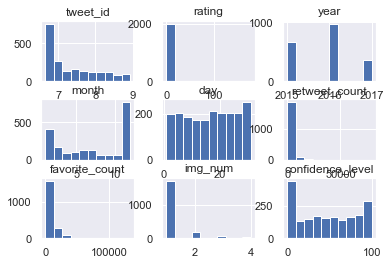

In [94]:
# let's begin with lookin at the distribution of the data
master_df.hist()

### 1. What is the most retweeted tweet

In [95]:
# getting the indexes of the most retweeted tweet
master_df['retweet_count'].nlargest()

775    79515
400    56625
810    52360
309    48265
58     45849
Name: retweet_count, dtype: int64

In [96]:
# querying for further information for the record with highest number of retweets
master_df.iloc[775]

tweet_id                                           744234799360020481
source                                             Twitter for iPhone
text                Here's a doggo realizing you can stand in a po...
name                                                             None
rating                                                            1.3
year                                                             2016
month                                                               6
day                                                                18
stage                                                           doggo
retweet_count                                                   79515
favorite_count                                                 131075
img_num                                                             1
breed                                              labrador_retriever
confidence_level                                                82.53
Name: 775, dtype: ob

- The most retweeted tweet on We Rate Dog is the tweet with an id number of `744234799360020481` which source was from `Twitter for iPhone`. This tweet was made on `18 June 2016` and it was favourited `131075` times and retweeted `79515` times. Based on predictions, it is assummed to be of a `labrador_retriever` breed having a confidence level of `82.53%`. It has a rating of `1.3`.

### 2. What is the most favourited tweet

In [97]:
# getting the index with the most favourited tweet
master_df['favorite_count'].nlargest()

309    132810
775    131075
58     107956
400    107015
108    106827
Name: favorite_count, dtype: int64

In [98]:
master_df.iloc[309]

tweet_id                                           822872901745569793
source                                             Twitter for iPhone
text                Here's a super supportive puppo participating ...
name                                                             None
rating                                                            1.3
year                                                             2017
month                                                               1
day                                                                21
stage                                                           puppo
retweet_count                                                   48265
favorite_count                                                 132810
img_num                                                             1
breed                                                lakeland_terrier
confidence_level                                                 19.6
Name: 309, dtype: ob

- The most retweeted tweet on We Rate Dog is the tweet with an id number of `822872901745569793` which source was from `Twitter for iPhone`. This tweet was made on `21 January 2017` and it was favourited `132810` times and retweeted `48265` times. Based on predictions, it is assummed to be of a `lakeland_terrier` breed having a confidence level of `19.60%`. It has a rating of `1.3`.

### 3. Is there a relationship between retweets and favourites

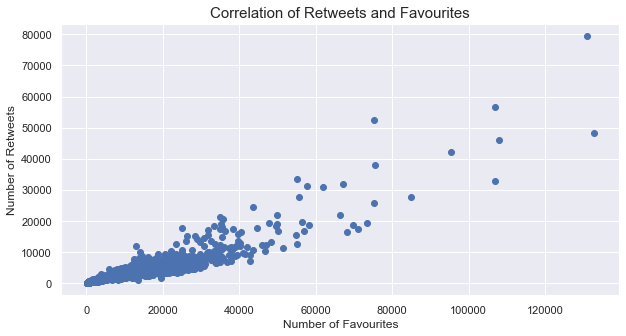

In [99]:
# creating a scatter plot to show correlation
fig = plt.figure(figsize=(10,5))
plt.scatter(master_df['favorite_count'], master_df['retweet_count'])
plt.title('Correlation of Retweets and Favourites', fontsize=15)
plt.xlabel('Number of Favourites', fontsize=12)
plt.ylabel('Number of Retweets', fontsize=12)

plt.savefig('corr_ret.png')
plt.show()

- According to the scatter plot above, it shows that there is a positive correlation between Retweets and Favourites but since there was no statistical operation performed here we can't be certain.

### 4. What year was the highest number of tweet created

In [100]:
high_tweet = master_df.groupby(['year','month'])['tweet_id'].count()

In [101]:
high_tweet

year  month
2015  11       296
      12       367
2016  1        169
      2        111
      3        120
      4         54
      5         57
      6         81
      7         88
      8         59
      9         63
      10        65
      11        53
      12        54
2017  1         66
      2         64
      3         48
      4         41
      5         43
      6         44
      7         49
      8          2
Name: tweet_id, dtype: int64

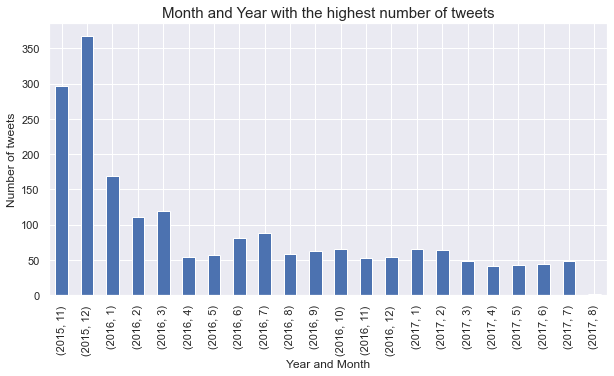

In [102]:
# visualizing the data above on a bar chart
fig = plt.figure(figsize = (10,5))
high_tweet.plot(kind='bar')
plt.title('Month and Year with the highest number of tweets', fontsize=15)
plt.xlabel('Year and Month', fontsize =12)
plt.ylabel('Number of tweets', fontsize =12)


plt.savefig('bar_tweet.png')
plt.show()

- It can clearly be seen from the plot above that the highest number of tweets which is `367` was made in the month of December and in the year 2015. The number of tweets being created has been depreciating over the years.

### 5. What dog breed has the highest favourited tweet and retweeted tweet

In [103]:
# querying for only breeds with a name other than None
breed_count = master_df[master_df.breed != 'None']
# grouping by breed while summing the favourite_count
breed_count = breed_count.groupby('breed')['favorite_count'].sum()
# sorting the values in descending order
breed_count = breed_count.sort_values(ascending=False)
# querying for the top 10 highest favourited tweets
breed_count_10 = breed_count.head(10)
breed_count_10

breed
golden_retriever      1946934
labrador_retriever    1274526
pembroke              1039484
chihuahua              746604
samoyed                583906
french_bulldog         570921
chow                   446933
cocker_spaniel         407412
pug                    383817
toy_poodle             339068
Name: favorite_count, dtype: int64

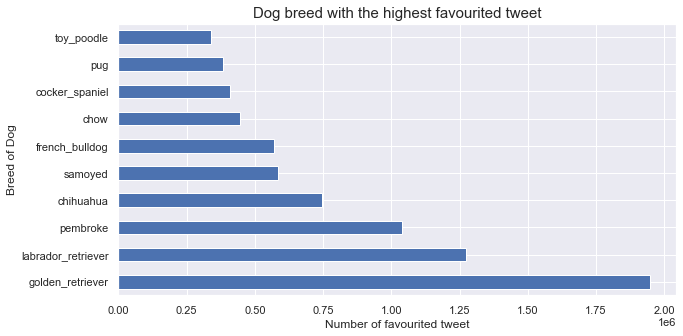

In [104]:
def plot(data,title,xlabel):
    data.plot(kind='barh', figsize=(10,5))
    plt.title(title, fontsize=15)
    plt.ylabel('Breed of Dog', fontsize=12)
    plt.xlabel(xlabel, fontsize=12)
    
    
    
plot(breed_count_10,'Dog breed with the highest favourited tweet','Number of favourited tweet')
plt.savefig('bar_fav.png')
plt.show()

- From the plot above it is clear that the breed of dog with the highest number of favourited tweet  is the `Golden Retriever` which favourited for a total `1946934` times. The second being `Labrador Retriever` which was favourited for a total of `1274526` times.

In [105]:
# querying for only breeds with a name other than None
breed_count2 = master_df[master_df.breed != 'None']
# grouping by breed while summing the favourite_count
breed_count2 = breed_count2.groupby('breed')['retweet_count'].sum()
# sorting the values in descending order
breed_count2 = breed_count2.sort_values(ascending=False)
# querying for the top 10 highest retweeted tweets
breed_count_10_2 = breed_count2.head(10)
breed_count_10_2

breed
golden_retriever      587528
labrador_retriever    407573
pembroke              292052
chihuahua             251807
samoyed               203446
french_bulldog        156230
cocker_spaniel        145743
chow                  131025
pug                   118682
toy_poodle            115768
Name: retweet_count, dtype: int64

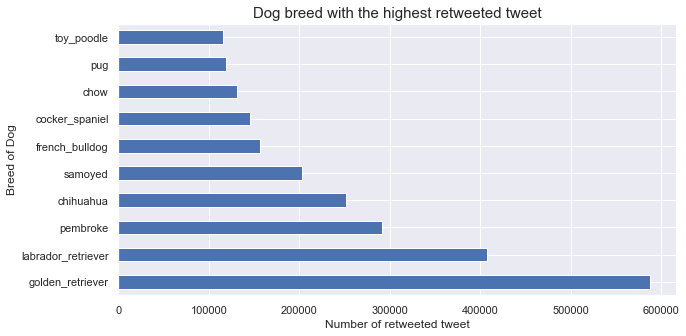

In [106]:
plot(breed_count_10_2,'Dog breed with the highest retweeted tweet','Number of retweeted tweet')
plt.savefig('bar_retw.png')
plt.show()

- From the plot above it is clear that the breed of dog with the highest number of retweeted tweet  is the `Golden Retriever` which retweeted for a total `587528` times. The second being `Labrador Retriever` which was retweeted for a total of `407573` times.

### 6. What is the relationship between the ratings and the number of retweets

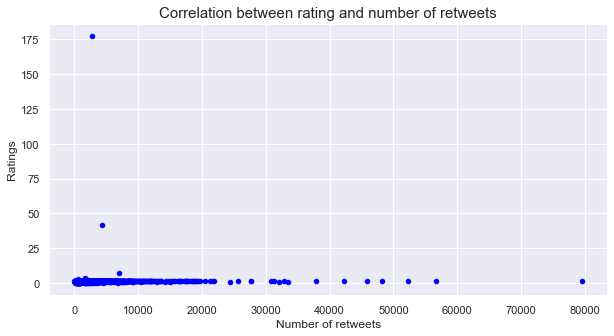

In [107]:
master_df.plot(x='retweet_count', y='rating', kind='scatter',color='blue', figsize=(10,5))
plt.title('Correlation between rating and number of retweets', fontsize=15)
plt.xlabel('Number of retweets', fontsize=12)
plt.ylabel('Ratings', fontsize=12)


plt.savefig('corr_rate.png')
plt.show()

- It is clear from the graph above that there is no correlation between the ratings and the number of retweets. That is, the tweets with the highest ratings do not necessarily receive more retweets.

### 7. What is the most common dog breed to be tweeted about

In [108]:
common_dog_breed = master_df.groupby('breed')['tweet_id'].count()
common_dog_breed = common_dog_breed.sort_values(ascending=False)
# getting the top 5 most common breed to be tweeted about
common_dog_breed = common_dog_breed.head(5)

In [109]:
common_dog_breed

breed
golden_retriever      158
labrador_retriever    108
pembroke               95
chihuahua              91
pug                    62
Name: tweet_id, dtype: int64

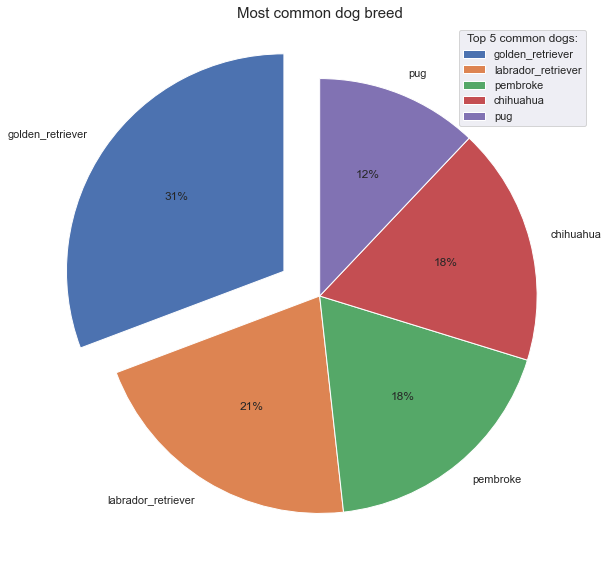

In [110]:
# plotting the data
my_labels = ['golden_retriever','labrador_retriever','pembroke','chihuahua','pug']
my_explode = [0.2,0,0,0,0]

fig = plt.figure(figsize=(15,10))
plt.pie(common_dog_breed, labels=my_labels, startangle=90, explode=my_explode, autopct='%.0f%%')
plt.title('Most common dog breed', fontsize = 15)
plt.legend(title='Top 5 common dogs:', loc=1)

plt.savefig('pie_breed.png')

- From the visualiation above, it can be deduced that the most common breed of dog to be tweeted about is `golden retriever`  which commands 31% of the popularity amongst the top 5 and a total number of `158` tweets to be created about the breed.  It has about 50 tweets more than the next most popular breed which is `labrador_retriever` having a total number of `108` tweets.